# AST 7939 Homework Assignment #2 (10 pts)

## All work is due Wednesday February 22 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and try to add comment lines as needed to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

## 1. Computational complexity (2 pts)

We learned that different machine learning algorithms have different computational costs. Let's check this out using the two moons dataset (see the cell below for an example). 

(a) While varying the number of data points in the training/test dataset from 100, 1000, 10000, to 100000, measure the time it takes for kNN, DT, and SVM to create a model (i.e., fit) and make predictions. For simplicity, instead of optimizing hyperparameters, use n_neighbors=10 for kNN, max_depth=4 for DT, and kernel="rbf", C=1, gamma=1 for SVM. (1 pt)

In [1]:
import time
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
# Create a data frame to save information

dataset_sizes = [100, 1000, 10000, 100000]
time_dict = {'Dataset Size': dataset_sizes, 
             'KNN Fit': np.zeros(4),
             'DT Fit': np.zeros(4),
             'SVC Fit': np.zeros(4),
             'KNN Predict': np.zeros(4),
             'DT Predict': np.zeros(4),
             'SVC Predict': np.zeros(4)}
ModelTimes = pd.DataFrame(data=time_dict)
ModelTimes

,Dataset Size,KNN Fit,DT Fit,SVC Fit,KNN Predict,DT Predict,SVC Predict
0,100,0.0,0.0,0.0,0.0,0.0,0.0
1,1000,0.0,0.0,0.0,0.0,0.0,0.0
2,10000,0.0,0.0,0.0,0.0,0.0,0.0
3,100000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# For each dataset size, fit each of the models
# and save the times in the data frame

for i, n in enumerate(dataset_sizes):
    X, y = datasets.make_moons(n_samples=n, noise=0.3, random_state=0)
    # X_train, y_train, X_test, y_test = train_test_split(X, y)
    # X_eval, y_eval = datasets.make_moons(n_samples=n, noise=0.3, random_state=0)

    knn_tstart = time.time()
    knn_model = KNeighborsClassifier(n_neighbors=10).fit(X, y)
    knn_fittime = time.time() - knn_tstart
    knn_predstart = time.time()
    knn_predict = knn_model.predict(X)
    knn_predtime = time.time() - knn_predstart
    ModelTimes['KNN Fit'][i] = knn_fittime
    ModelTimes['KNN Predict'][i] = knn_predtime

    dt_tstart = time.time()
    dt_model = DecisionTreeClassifier(max_depth=4).fit(X, y)
    dt_fittime = time.time() - dt_tstart
    dt_predstart = time.time()
    dt_predict = dt_model.predict(X)
    dt_predtime = time.time() - dt_predstart
    ModelTimes['DT Fit'][i] = dt_fittime
    ModelTimes['DT Predict'][i] = dt_predtime

    svc_tstart = time.time()
    svc_model = SVC(kernel='rbf', C=1, gamma=1).fit(X, y)
    svc_fittime = time.time() - svc_tstart
    svc_predstart = time.time()
    svc_predict = svc_model.predict(X)
    svc_predtime = time.time() - svc_predstart
    ModelTimes['SVC Fit'][i] = svc_fittime
    ModelTimes['SVC Predict'][i] = svc_predtime
    

C:\Users\rlosacco\AppData\Local\Temp\ipykernel_1556\3468127918.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModelTimes['KNN Fit'][i] = knn_fittime
C:\Users\rlosacco\AppData\Local\Temp\ipykernel_1556\3468127918.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModelTimes['KNN Predict'][i] = knn_predtime
C:\Users\rlosacco\AppData\Local\Temp\ipykernel_1556\3468127918.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ModelTim

In [4]:
ModelTimes

,Dataset Size,KNN Fit,DT Fit,SVC Fit,KNN Predict,DT Predict,SVC Predict
0,100,0.001983,0.002003,0.004264,0.011084,0.000000,0.001035
1,1000,0.002619,0.002276,0.018359,0.050469,0.000000,0.039341
2,10000,0.007509,0.014284,1.162297,0.438691,0.000000,2.672853
3,100000,0.384122,0.142666,103.413508,3.934750,0.005985,261.216720


(b) Make a plot showing the running time vs. size of dataset for the three algorightms and for training/prediction -- you will have six curves in the end. Make sure your figure is readable. Discuss what you find from the plot. Using a logarithmic scale for both x and y axes will be helpful to interpret the result. (1 pt)

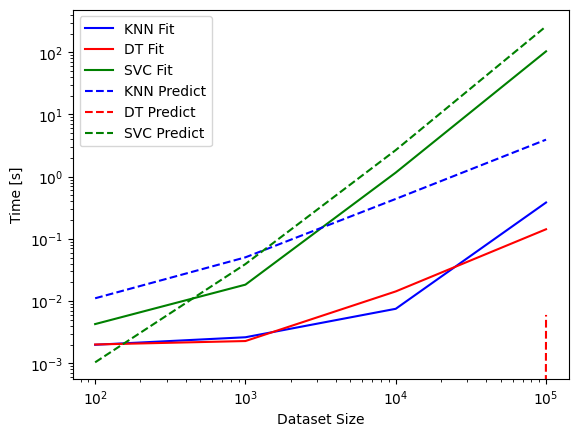

In [5]:
import matplotlib.pyplot as plt

plt.plot(ModelTimes['Dataset Size'], ModelTimes['KNN Fit'], 'b-', label='KNN Fit')
plt.plot(ModelTimes['Dataset Size'], ModelTimes['DT Fit'], 'r-', label='DT Fit')
plt.plot(ModelTimes['Dataset Size'], ModelTimes['SVC Fit'], 'g-', label='SVC Fit')
plt.plot(ModelTimes['Dataset Size'], ModelTimes['KNN Predict'], 'b--', label='KNN Predict')
plt.plot(ModelTimes['Dataset Size'], ModelTimes['DT Predict'], 'r--', label='DT Predict')
plt.plot(ModelTimes['Dataset Size'], ModelTimes['SVC Predict'], 'g--', label='SVC Predict')

plt.xlabel('Dataset Size')
plt.xscale('log')
plt.ylabel('Time [s]')
plt.yscale('log')
plt.legend()
plt.show()

## 2. Support Vector Machine classifier (8 pts)

We will build Support Vector Machines to determine the hyperplane separating Super-Earths and Sub-Neptunes, the so-called radius valley in planet radius vs. orbital period plots (see Fulton et al. 2017; https://ui.adsabs.harvard.edu/abs/2017AJ....154..109F/abstract). To determine accurate planet parameters from transit surveys, accurate stellar parameters are required, because the transit depth only constrains $R_p/R_*$, where $R_p$ and $R_*$ are the planetary and stellar radius. In Van Eylen et al. (2018; https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.4786V/abstract), authors used a sample of exoplanet host stars with parameters homogeneously measured from asteroseismology, which can provide highly precise masses and radii for a sample of bright stars, and determined that the radius valley can be describe by ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$, where $m=-0.09^{+0.02}_{-0.04}$ and $a=0.37^{+0.04}_{-0.02}$.

In this homework problem, we will reproduce the SVM models of Van Eylen et al. (2018).

(a) First things first: let's collect the data presented in Table 1 of Van Eylen et al. (2018). One way to do this is to download the source file from the arXiv and read in the table (and do some cleaning). This can be tedious, but remember that making a ML model will always start with data acquisition and cleaning! When you submit your homework, upload the data file you compile so that I can reproduce your results. (1 pt)

In [1]:
import pandas as pd
# csv file of exoplanet data:
exodata = pd.read_csv('exoplanet_data.csv', encoding='unicode_escape')

# Splitting uncertainties
exodata[['Rp', 'Rp sigma']] = exodata['Rp'].str.split(' ± ', expand=True).astype(float)  # Planet radius and sigma
# exodata[['Mstar', 'Mstar usigma']] = exodata['Mstar'].str.split('+', expand=True)   # Star mass and upper limit
# exodata[['Mstar usigma', 'Mstar lsigma']] = exodata['Mstar usigma'].str.split('_', expand=True)  # Upper vs lower limit of star mass
# exodata[['Rstar', 'Rstar usigma']] = exodata['Rstar'].str.split('+', expand=True)
# exodata[['Rstar usigma', 'Rstar lsigma']] = exodata['Rstar usigma'].str.split('_', expand=True)
# Not really using whatever sigP is, so ignoring it for now
exodata

,Planet,Rp,Period,sigP,Mstar,Rstar,Rp sigma
0,Kepler-10b,1.473,0.837490,29),0.920+0.010_0.020,1.0662+0.0069_0.0075,0.026
1,Kepler-10c,2.323,45.294292,97),0.920+0.010_0.020,1.0662+0.0069_0.0075,0.028
2,Kepler-23b,1.694,7.106995,73),1.078+0.077_0.077,1.548+0.048_0.048,0.076
3,Kepler-23c,3.120,10.742434,39),1.078+0.077_0.077,1.548+0.048_0.048,0.100
4,Kepler-23d,2.235,15.274290,17),1.078+0.077_0.077,1.548+0.048_0.048,0.088
...,...,...,...,...,...,...,...
112,K02706.01,1.797,3.097597,22),1.26+0.18_0.18,1.86+0.08_0.08,0.082
113,Kepler-1392,0.684,2.128229,24),0.99+0.15_0.15,1.3+0.06_0.06,0.052
114,K02801.01,0.870,6.991800,16),1.12+0.17_0.17,1.45+0.06_0.06,0.061
115,Kepler-1394,1.040,3.938000,32),1.51+0.21_0.21,1.98+0.08_0.08,0.110


(b) Let's make a plot showing planet radius vs. orbital period, similar to Figure 2 of Van Eylen et al. (2018) but without additional data from Fulton et al. (2017). Similar to Figure 2 of Van Eylen et al. (2018), make two panels, one showing the entire data points and the other showing 1-100 days & 1-4 Earth radii to more clearly identify the radius valley. (1 pt)

In [31]:
small_mask = (exodata['Rp'] < 4.0) & (exodata['Period'] < 100.0)
small_exo = exodata[small_mask]
small_exo

,Planet,Rp,Period,sigP,Mstar,Rstar,Rp sigma,log_Period,log_Rp,Planet Class
0,Kepler-10b,1.473,0.837490,29),0.920+0.010_0.020,1.0662+0.0069_0.0075,0.026,-0.077020,0.168203,1
1,Kepler-10c,2.323,45.294292,97),0.920+0.010_0.020,1.0662+0.0069_0.0075,0.028,1.656043,0.366049,0
2,Kepler-23b,1.694,7.106995,73),1.078+0.077_0.077,1.548+0.048_0.048,0.076,0.851686,0.228913,1
3,Kepler-23c,3.120,10.742434,39),1.078+0.077_0.077,1.548+0.048_0.048,0.100,1.031103,0.494155,0
4,Kepler-23d,2.235,15.274290,17),1.078+0.077_0.077,1.548+0.048_0.048,0.088,1.183961,0.349278,0
...,...,...,...,...,...,...,...,...,...,...
112,K02706.01,1.797,3.097597,22),1.26+0.18_0.18,1.86+0.08_0.08,0.082,0.491025,0.254548,1
113,Kepler-1392,0.684,2.128229,24),0.99+0.15_0.15,1.3+0.06_0.06,0.052,0.328018,-0.164944,1
114,K02801.01,0.870,6.991800,16),1.12+0.17_0.17,1.45+0.06_0.06,0.061,0.844589,-0.060481,1
115,Kepler-1394,1.040,3.938000,32),1.51+0.21_0.21,1.98+0.08_0.08,0.110,0.595276,0.017033,1


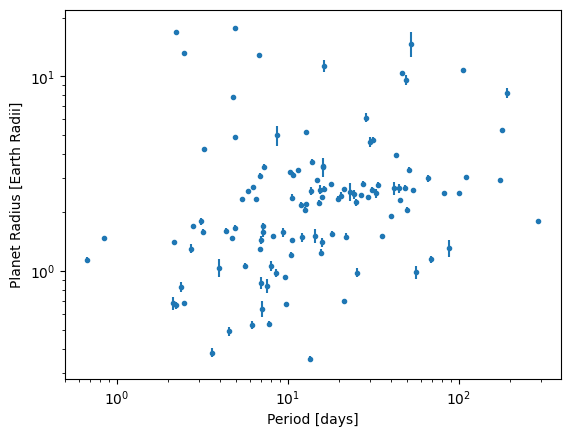

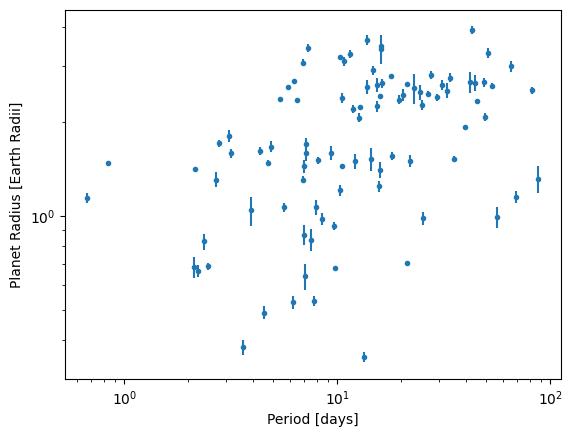

In [3]:
import matplotlib.pyplot as plt

plt.errorbar(exodata['Period'], exodata['Rp'], yerr=exodata['Rp sigma'], fmt='.')
plt.xlabel('Period [days]')
plt.xscale('log')
plt.ylabel('Planet Radius [Earth Radii]')
plt.yscale('log')
plt.show()
plt.close()

plt.errorbar(small_exo['Period'], small_exo['Rp'], yerr=small_exo['Rp sigma'], fmt='.')
plt.xlabel('Period [days]')
plt.xscale('log')
plt.ylabel('Planet Radius [Earth Radii]')
plt.yscale('log')
plt.show()
plt.close()

(c) We would like to fit the radius valley using the SVM. However, in order to use the SVM, we need a labelled data in the first place. Luckily, we have a well separated dataset. In Van Eylen et al. (2018), they took a few different approaches to fit the radius valley. Here, let's use one of the fits from bootstrapping, that is, if a planet's radius and orbital periods satisfy ${\rm log}_{10} R_p > m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$, then we will label them as sub-Neptunes. If ${\rm log}_{10} R_p \leq m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$, we will label them as super-Earth. Using this criterion, make an array that contains the label (e.g., 0 if sub-Neptune, 1 if super-Earth).

Then, repeat #2b and make similar plots, but this time make the data points color-coded by their labels. Also, add a line showing ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$. Your plot should look similar to Figure 5 of Van Eylen et al. (2018), except that you will have a single line dividing super-Earths and sub-Neptunes instead of multiple lines representing 20 different fits. (1 pt)

In [4]:
import numpy as np

exodata['log_Period'] = np.log10(exodata['Period'])
exodata['log_Rp'] = np.log10(exodata['Rp'])

In [5]:
def exo_function(logperiod):
    '''
    Defining the function which separates super-Earths and sub-Neptunes.
    Input: log10 of orbital period (float)
    Output: log10(Rp) (float), where 1 separates the two types of planets
    '''
    m = -0.10
    a = 0.38
    logRp = (m*logperiod + a)
    return logRp


def exo_label(logradius, logperiod):
    '''
    Function which separates super-Earths and sub-Neptunes.
    Input: planet's radius, orbital period (float)
    Output: planet classification label (str), target value (0 or 1, int)
    '''
    if logradius <= exo_function(logperiod):
        return 1  # super-Earth
    if logradius > exo_function(logperiod):
        return 0  # sub-Neptune

In [6]:
exodata['Planet Class'] = exodata.apply(lambda x: exo_label(x.log_Rp, x.log_Period), axis=1)
exodata

,Planet,Rp,Period,sigP,Mstar,Rstar,Rp sigma,log_Period,log_Rp,Planet Class
0,Kepler-10b,1.473,0.837490,29),0.920+0.010_0.020,1.0662+0.0069_0.0075,0.026,-0.077020,0.168203,1
1,Kepler-10c,2.323,45.294292,97),0.920+0.010_0.020,1.0662+0.0069_0.0075,0.028,1.656043,0.366049,0
2,Kepler-23b,1.694,7.106995,73),1.078+0.077_0.077,1.548+0.048_0.048,0.076,0.851686,0.228913,1
3,Kepler-23c,3.120,10.742434,39),1.078+0.077_0.077,1.548+0.048_0.048,0.100,1.031103,0.494155,0
4,Kepler-23d,2.235,15.274290,17),1.078+0.077_0.077,1.548+0.048_0.048,0.088,1.183961,0.349278,0
...,...,...,...,...,...,...,...,...,...,...
112,K02706.01,1.797,3.097597,22),1.26+0.18_0.18,1.86+0.08_0.08,0.082,0.491025,0.254548,1
113,Kepler-1392,0.684,2.128229,24),0.99+0.15_0.15,1.3+0.06_0.06,0.052,0.328018,-0.164944,1
114,K02801.01,0.870,6.991800,16),1.12+0.17_0.17,1.45+0.06_0.06,0.061,0.844589,-0.060481,1
115,Kepler-1394,1.040,3.938000,32),1.51+0.21_0.21,1.98+0.08_0.08,0.110,0.595276,0.017033,1


In [7]:
subneptunes = exodata[exodata['Planet Class'] == 0]
superearths = exodata[exodata['Planet Class'] == 1]

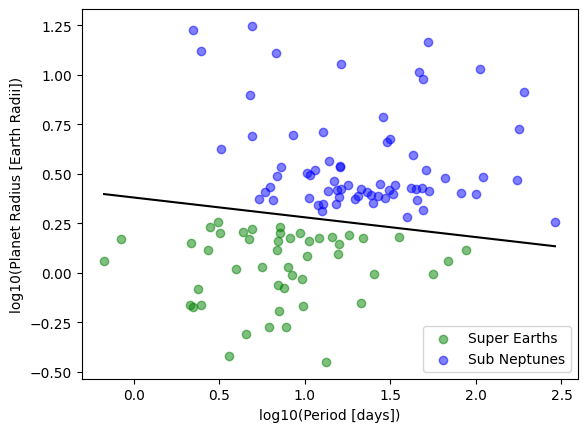

In [8]:
linex = np.linspace(min(exodata['log_Period']), max(exodata['log_Period']), 100)
liney = exo_function(linex)
plt.plot(linex, liney, 'k')

plt.scatter(superearths['log_Period'], superearths['log_Rp'], color='g', alpha=0.5, label='Super Earths')
plt.scatter(subneptunes['log_Period'], subneptunes['log_Rp'], color='b', alpha=0.5, label='Sub Neptunes')
plt.legend()
plt.xlabel('log10(Period [days])')
plt.ylabel('log10(Planet Radius [Earth Radii])')
plt.show()

(d) Now that we have a labelled dataset, we are ready to build SVM models. Using orbital period and planet radius (both in log scale) as two features, make a few linear SVM models varying the penalty parameter C from 0.01, 0.1, 1, 10, 100, to 1000. Then, make six figures showing the data, hyperplane, and support vectors. Don't forget that SVMs need feature scaling. (2 pt)

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = exodata[['log_Rp', 'log_Period']]
y = exodata[['Planet Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('svc', LinearSVC())
])

param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True, verbose=3)
grid_search.fit(X_train, y_train)


C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...svc__C=0.01;, score=(train=0.957, test=0.944) total time=   0.0s
[CV 2/5] END ...svc__C=0.01;, score=(train=0.971, test=1.000) total time=   0.0s
[CV 3/5] END ...svc__C=0.01;, score=(train=0.971, test=0.882) total time=   0.0s
[CV 4/5] END ...svc__C=0.01;, score=(train=0.971, test=0.941) total time=   0.0s
[CV 5/5] END ...svc__C=0.01;, score=(train=0.971, test=1.000) total time=   0.0s
[CV 1/5] END ....svc__C=0.1;, score=(train=0.986, test=0.944) total time=   0.0s
[CV 2/5] END ....svc__C=0.1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 3/5] END ....svc__C=0.1;, score=(train=0.986, test=0.941) total time=   0.0s
[CV 4/5] END ....svc__C=0.1;, score=(train=0.986, test=1.000) total time=   0.0s
[CV 5/5] END ....svc__C=0.1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 1/5] END ......svc__C=1;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 2/5] END ......svc__C=1;, score=(train=1.000,

C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[CV 4/5] END ...svc__C=1000;, score=(train=1.000, test=1.000) total time=   0.0s
[CV 5/5] END ...svc__C=1000;, score=(train=1.000, test=1.000) total time=   0.0s


C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('svc', LinearSVC())]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, verbose=3)

In [22]:
print("Best parameters: ", grid_search.best_params_)
print("Best model: ", grid_search.best_estimator_)
print("Test score: ", grid_search.score(X_test, y_test))

Best parameters:  {'svc__C': 1}
Best model:  Pipeline(steps=[('scale', StandardScaler()), ('svc', LinearSVC(C=1))])
Test score:  1.0


In [41]:
# make six figures showing the data, hyperplane, and support vectors
# so instead of trusting the gridsearchcv to tell me the one parameter that's best, i guess i'll just do them all
# make a function to test all 6 C values

def exo_svc(data, target, c):
    '''
    Fit a SVC model for a given C-parameter, find the support vector information
    Input: X data, y target, C-parameter for SVC
    Output: SVC model (with support vectors updated)
    '''
    # Sscale and split data
    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, random_state=0)

    # Linear SVC model
    scaled_model = LinearSVC(C=c, random_state=0)
    
    # Fit data
    scaled_model.fit(X_train, y_train)
    print(f'For C = {c}, score = {scaled_model.score(X_test, y_test)}')

    # Re-assign intercept and coefficients to be scaled
    a = scaled_model.decision_function([-scaler.mean_ / scaler.scale_])
    scaled_model.intercept_ = np.array([a])
    m = scaled_model.coef_[0] / scaler.scale_
    scaled_model.coef_ = np.array([m])

    # Support vector
    # I have no idea what this is doing...
    t = np.array(target * 2 - 1)
    data_array = np.array(data.values)
    support_vectors_idx = (t * (data_array.dot(m) + a) < 1).ravel()
    print(support_vectors_idx.shape)
    print(support_vectors_idx)
    scaled_model.support_vectors_ = data_array[support_vectors_idx]

    return(scaled_model)

In [42]:
def plot_svc(model, xmin, xmax):
    '''
    Plot decision boundary of a given SVC model
    Input: SVC model, minimum x-value, maximum x-value
    Output: None (but scatter plot)
    '''
    xrange = np.linspace(xmin, xmax, 100)
    m = model.coef_[0]
    a = model.intercept_[0]
    support_vector = model.support_vectors_

    decision_boundary = -m[0]/m[1] * xrange - a/m[1]
    margin = 1/m[1]
    upper_margin = decision_boundary + margin
    lower_margin = decision_boundary - margin

    plt.scatter(support_vector['log_Period'], support_vector['log_Rp'], edgecolors='k', facecolors='none')
    plt.plot(xrange, decision_boundary, 'k-')
    plt.plot(xrange, upper_margin, 'k--')
    plt.plot(xrange, lower_margin, 'k--')

In [43]:
# Testing
exofit = exo_svc(X, y, 100)
# exofit.support_vectors_

For C = 100, score = 1.0
(13689,)
[False  True False ... False False False]


C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 117 but corresponding boolean dimension is 13689

C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9333333333333333


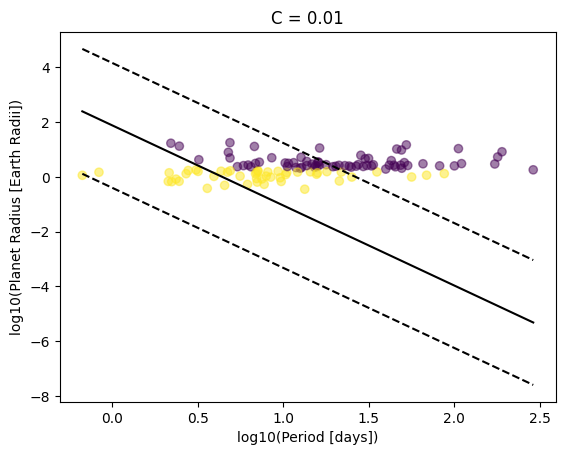

1.0


C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


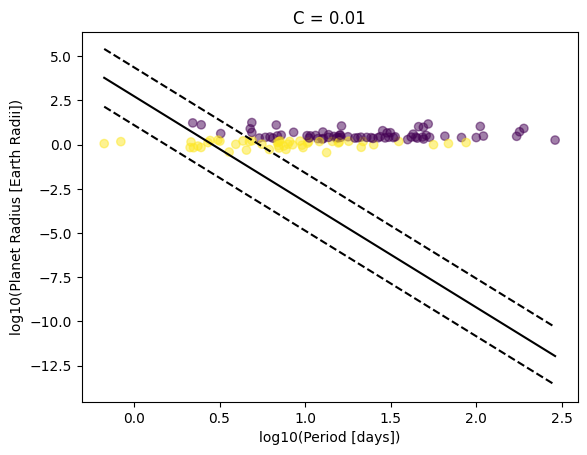

C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


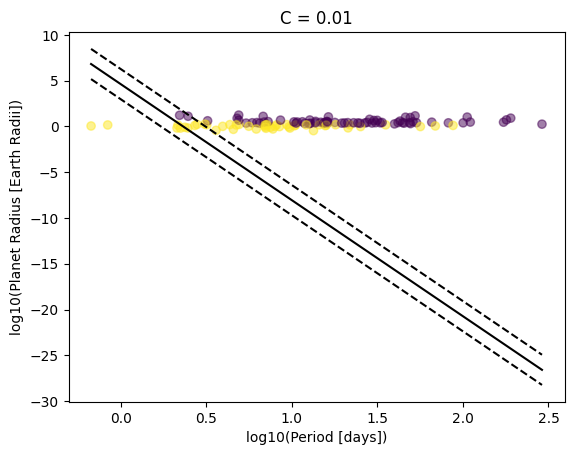

1.0


C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


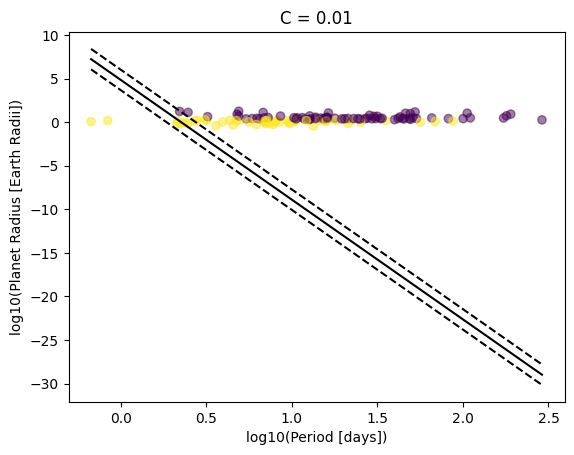

C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


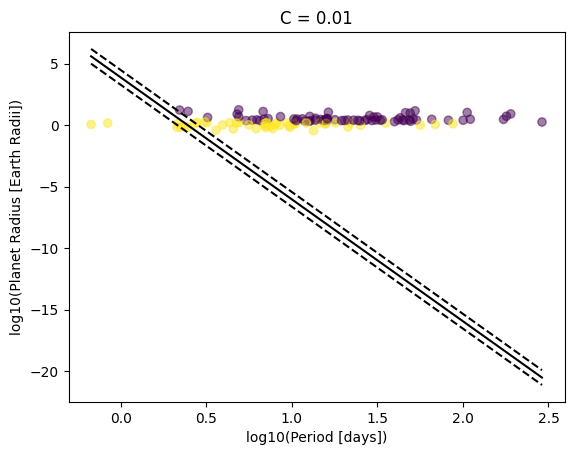

C:\Users\rlosacco\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


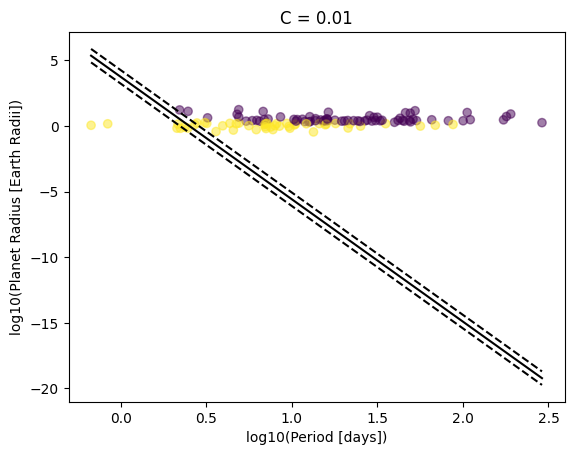

In [13]:
cvalues = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

for c in cvalues:
    exofit = exo_svc(X, y, c)

    plt.scatter(X['log_Period'], X['log_Rp'], c=np.array(y['Planet Class']), cmap='viridis', alpha=0.5)
    plot_svc(exofit, min(X['log_Period']), max(X['log_Period']))
    # plt.legend()
    plt.xlabel('log10(Period [days])')
    plt.ylabel('log10(Planet Radius [Earth Radii])')
    plt.title('C = 0.01')
    plt.show()
    plt.close()

(e) Which penalty parameter $C$ do you think best seperates super-Earths and sub-Neptunes? And why? Write down an equation for the hyperplane in the form of ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$. (1 pt)

The problem with using SVC for separating these two exoplanet classifications based on orbital period vs. planetary radius is that there is a huge gap between them -- the radius gap. SVM are better used when there is some overlap, so that a `C` parameter of ~100 makes a significant difference over `C`=1. Here, though, because there is such a distinction between the two classifications, `C`=1 is able to get a score of 100%. And that makes sense -- I could physically take a ruler and pencil to the plot and find a line of best fit.

Two ways to improve this issue is to (1) have more data, and (2) have more features. There are just over 100 data points in the set, which is fairly low. A dataset closer to 500-1000 would be preferred, to really outline the radius gap or find if any exoplanets inhabit the gap. The obvious limitation to that is simply finding the exoplanets, and specifically those in the period and radius range that is significant to this project. The second improvement is to consider more features besides period and radius. This is where machine learning algorithms can really shine over human scientists, trying to find patterns that have been overlooked. Even if the period and radius are the most important features, we haven't run a feature importance test to confirm. 

Ultimately I don't think this is a good example for practicing SVM models. The data is split too well, rendering the `C` parameter and the algorithm at large effectively useless. A better dataset would have more data points and more features to explore.

-Rachel

(f) Uncertainties on the slope $m$ and offset $a$ can be determined using bootstrapped samples ([random sampling with replacement](https://en.wikipedia.org/wiki/Bootstrapping_(statistics) )). Following Van Eylen et al. (2018), generate 1000 bootstrapped samples each of which has the same size as the original dataset. For each bootstrapped, compute the slope $m$ and offset $a$ of the hyperplane using the best $C$ you determined from #2e. Compute the mean and standard deviation of $m$ and $a$. What is your final hyperplane, and how does that compare with the hyperplane Van Eylen et al. (2018) determined? (2 pt)  

In [ ]:
# np.random to create new x values
# then predict using those new random x values











### Congratulations! With this homework, you essentially reproduced results presented in a journal paper. If you enjoyed the homework and would like to do some additional related analysis, I recommend you have a look at the following papers. Reproducing (and extending) the following papers would be a nice term project.

https://ui.adsabs.harvard.edu/abs/2021AJ....161..265D/abstract

https://ui.adsabs.harvard.edu/abs/2023MNRAS.519.4056H/abstract